In [1]:
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1ο ερώτημα - Finite difference discretization

Στο πρώτο αυτό κομμάτι είναι η κατασκευή ενός συστήματος για την εύρεση 39x39 μεταβλητών (λόγω των γνωστών οριακών συνθηκών).
Το σύστημα θα είναι της μορφής: Kx = b, όπου
- ο πίνακας x έχει τις μεταβλητές προς εύρεση δηλαδή τις θερμοκρασίες T(x,y), όπου x,y $\in$ [0, 1] με Δx = Δy = 1/40
- ο πίνακας b έχει τις τιμές της f(x,y), όπου x,y $\in$ [0, 1] με Δx = Δy = 1/40
- ο πίνακας K θα είναι αυτός που θα κατασκευάσουμε για να επιλύσουμε το σύστημα

Παρατηρώντας την εξίσωση από την εκφώνηση για το finite difference scheme αντιλαμβανόμαστε ότι ο K θα αποτελείται ουσιαστικά από 5 διαγωνίους (μια διαγώνιο για κάθε όρο της T). Συνεπώς, θα αποθηκεύσουμε τα "βάρη" για κάθε στοιχείο με βάση την δοσμένη εξίσωση.

- T(x, y)  : κεντρική διαγώνιος με τιμή 4
- Τ(x+h, y): διαγώνιος 39 θέσεις δεξιά από την κεντρική με τιμή -1
- Τ(x-h, y): διαγώνιος 39 θέσεις αριστερά από την κεντρική με τιμή -1
- Τ(x, y+h): διαγώνιος 1 θέση δεξιά από την κεντρική με τιμή -1
- Τ(x, y+h): διαγώνιος 1 θέση αριστερά από την κεντρική με τιμή -1

Οι οριακές συνθήκες(Dirichlet Boundary Conditions):
- Τ(0, y) = 0
- T(40, y) = 0
- T(x, 0) = 0
- T(x, 40) = 0

Συνεπώς, πλεόν μπορούμε να λύσουμε το σύστημα.  (διαστάσεις K: (1521, 1521))

In [2]:
s  = 1521 # 39*39
main_diag = 4 * np.ones(s)
shift_diag_1 = - 1 * np.ones(s - 1)
shift_diag_39 = - 1 * np.ones(s - 39)
K = np.diag(main_diag)
K += np.diag(shift_diag_1, 1)
K += np.diag(shift_diag_1, -1)
K += np.diag(shift_diag_39, +39)
K += np.diag(shift_diag_39, -39)
K_inv = np.linalg.inv(K)

In [3]:
K

array([[ 4., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  4., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  4., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  4.]])

Έχοντας πλέον τον πίνακα K, θα καθορίσουμε τον πίνακα b, πρακτικά την συνάρτηση f δηλαδή, που εμπεριέχει την τυχαία μεταβλητή
r $\sim$ N(0.05, 0.005)

In [4]:
def f(x, y, r):
    term = [] 
    for x_t in x:
        for y_t in y:
            term.append(((-1/r) * ((x_t - 0.55)**2 + (y_t - 0.45)**2)))
    return (100 * h**2) * np.exp(np.array(term))

h = 1 / 40
x = np.linspace(h, 1 - h, 39)
y = np.linspace(h, 1 - h, 39)

## 2ο ερώτημα - Monte Carlo Simulation

Για να προσεγγίσουμε την probability density function της T(0.5, 0.5) παράγουμε ένα μεγάλο αριθμό δειγμάτων $r_i$ (iterations = 20000 εδω) και θα επιλύσουμε το σύστημα μας για κάθε ένα από αυτά τα δείγματα. Για κάθε λύση του συστήματος θα αποθηκεύουμε την Τ(0.5, 0.5) στην λίστα midpoints. Στην αρχή του συγκεκριμένου ερωτήματος υπολογίζουμε το index που αντιστοιχεί η τιμή που ψάχνουμε (προκύπτει index:760) 

In [5]:
# midpoint = int((s - 1) / 2)
# print(midpoint)

def midpoint():
    x = 0
    num=0
    for k in range(0,39):
            x = x + 1/40
            x = round(x, 4)
            y = 0
            for l in range(0,39):
                y =  y + 1/40
                y = round(y, 4)
                if (x==0.5) and (y==0.5): 
                    return num
                num=num+1
mid = midpoint()

In [6]:
iterations = 20000
midpoints = []
for i in tqdm(range(iterations), total = iterations):
    test = f(x, y, np.random.normal(0.05, 0.005))
    solution = np.dot(K_inv, test)
    midpoints.append(solution[mid])

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [01:04<00:00, 308.04it/s]


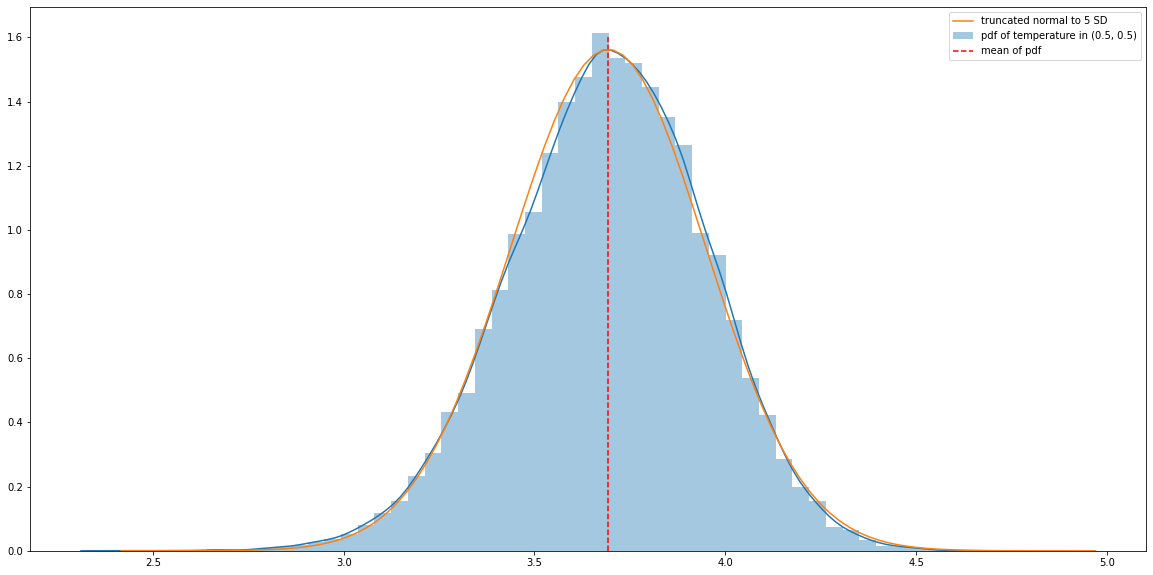

mean: 3.6934076490393375
variance: 0.06517310210747923


In [7]:
plt.figure(figsize = (20, 10))
sns.distplot(midpoints, label = "pdf of temperature in (0.5, 0.5)")
plt.vlines(np.mean(midpoints), ymin = 0, ymax = 1.6, colors = "red", label = "mean of pdf", linestyles = "dashed")
mu = np.mean(midpoints)
variance = np.var(midpoints)
sigma = math.sqrt(variance)
x_1 = np.linspace(mu - 5*sigma, mu + 5*sigma, 100) # truncated normal
plt.plot(x_1, stats.norm.pdf(x_1, mu, sigma), label = "truncated normal to 5 SD")
plt.legend()
plt.show()
print("mean: {}\nvariance: {}".format(np.mean(midpoints), np.var(midpoints)))

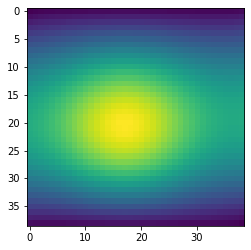

In [8]:
plt.imshow(np.reshape(solution, (39, 39)))
plt.show()

Όπως φαίνεται από το παραπάνω σχήμα η probability density function του T(0.5, 0.5) προσεγγίζεται πολύ καλά από μια φραγμένη Gaussian κατανομή με τα αντίστοιχα mean και variance. Ο λόγος που αναφέρουμε την φραγμένη Gaussian (εδώ με εύρος 5 τυπικών αποκλίσεων) είναι διότι στο δικό μας παράδειγμα μπορούμε να πάρουμε τιμές σε συγκεκριμένο εύρος. Ακόμη, παρουσιάζεται και μια "εικόνα" της πλάκας μετά την εκτέλεση του πειράματος.

## 3ο ερώτημα - PCA/POD

Γενικά, παρατηρούμε ότι η λύση του συστήματος σε συνδυασμό με το μεγάλο αριθμό (iterations) Monte-Carlo προσομοιώσεων είναι κάπως χρονοβόρα. Συνεπώς, στο συγκεκριμένο ερώτημα καλούμαστε να εφαρμόσουμε τον αλγόριθμο PCA/POD όπως αυτός περιγράφεται στις σημειώσεις του μαθήματος, με στόχο να μειώσουμε τις διαστάσεις του συστήματος.

Αρχικά, κατασκευάζουμε το νεο dataset μας που θα είναι ένας πίνακας 1521 x pca_iterations όπου pca_iterations << iterations (εδώ 200 << 20000)

In [9]:
pca_iterations = 200
reduced_sol = np.zeros((s, pca_iterations))
for i in tqdm(range(pca_iterations), total = pca_iterations):
    test = f(x, y, np.random.normal(0.05, 0.005))
    reduced_sol[:, i] = np.dot(K_inv, test)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 321.55it/s]


Ακολούθως, υπολογίζουμε τις ιδιοτιμές και τα ιδιοδιανύσματα για τον πίνακα reduced_sol $\ast$ reduced_sol.T και κρατάμε τα πρώτα (1, 2, 3) eigenevectors που αντιστοιχούν στα (1, 2, 3) μεγαλύτερα eigenvalues, όπως θα φανεί παρακάτω.

In [10]:
eigenvalues, eigenvectors = np.linalg.eigh(np.dot(reduced_sol, reduced_sol.T))

In [11]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigenvalues)[::-1]
 
sorted_eigenvalues = eigenvalues[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigenvectors[:, sorted_index]

Στη συνέχεια, πραγματοποιούμε πάλι Monte Carlo simulation με το νέο σύστημα μειωμένων πλέον διαστάσεων. Ειδικότερα έχουμε:
$K_{red} \ast u = b_{red}$, όπου
- $u$ είναι το ζητούμενο
- $K_{red} = eigenvectors.T \ast K \ast eigenvectors$
- $b_{red} = eigenvectors.T \ast b$

Κάθε λύση μπορούμε να την μεταφέρουμε στις αρχικές διαστάσεις ως εξής
- $ U_{real\_solution} = eigenvectors \ast u$

Επομένως, λύνουμε το σύστημα για την εύρεση του $u$ 20000 (iterations) φορές και κάθε πραγματοποιούμε την μεταφορά στις αρχικές διαστάσεις, κατόπιν επιλέγουμε το index (εδώ 760) που αντιστοιχεί στο midpoint (0.5, 0.5) και τελικά λαμβάνουμε τα αντίστοιχα ιστόγραμματα για 1, 2 και 3 PCA components.

In [12]:
def pca_solution(k, iterations):
    pca_eigenvectors = sorted_eigenvectors[:, :k]
    K_red = np.linalg.multi_dot([pca_eigenvectors.T, K, pca_eigenvectors])
    K_red_inv = np.linalg.inv(K_red)
    pca_solution = np.zeros((iterations, k))
    for i in range(iterations):
        F_red = np.dot(pca_eigenvectors.T, f(x, y, np.random.normal(0.05, 0.005)))
        pca_solution[i, :] = np.dot(K_red_inv, F_red)
    real_solution = np.dot(pca_eigenvectors, pca_solution.T)
    return real_solution.T

In [13]:
def real(k): return pca_solution(k, 20000)

PCA with 1 component:
	mean: 3.687993477926017
	variance: 0.08279648467281707
PCA with 2 component:
	mean: 3.692458615931538
	variance: 0.06488736731456773
PCA with 3 component:
	mean: 3.6924829894375244
	variance: 0.06524471629413622


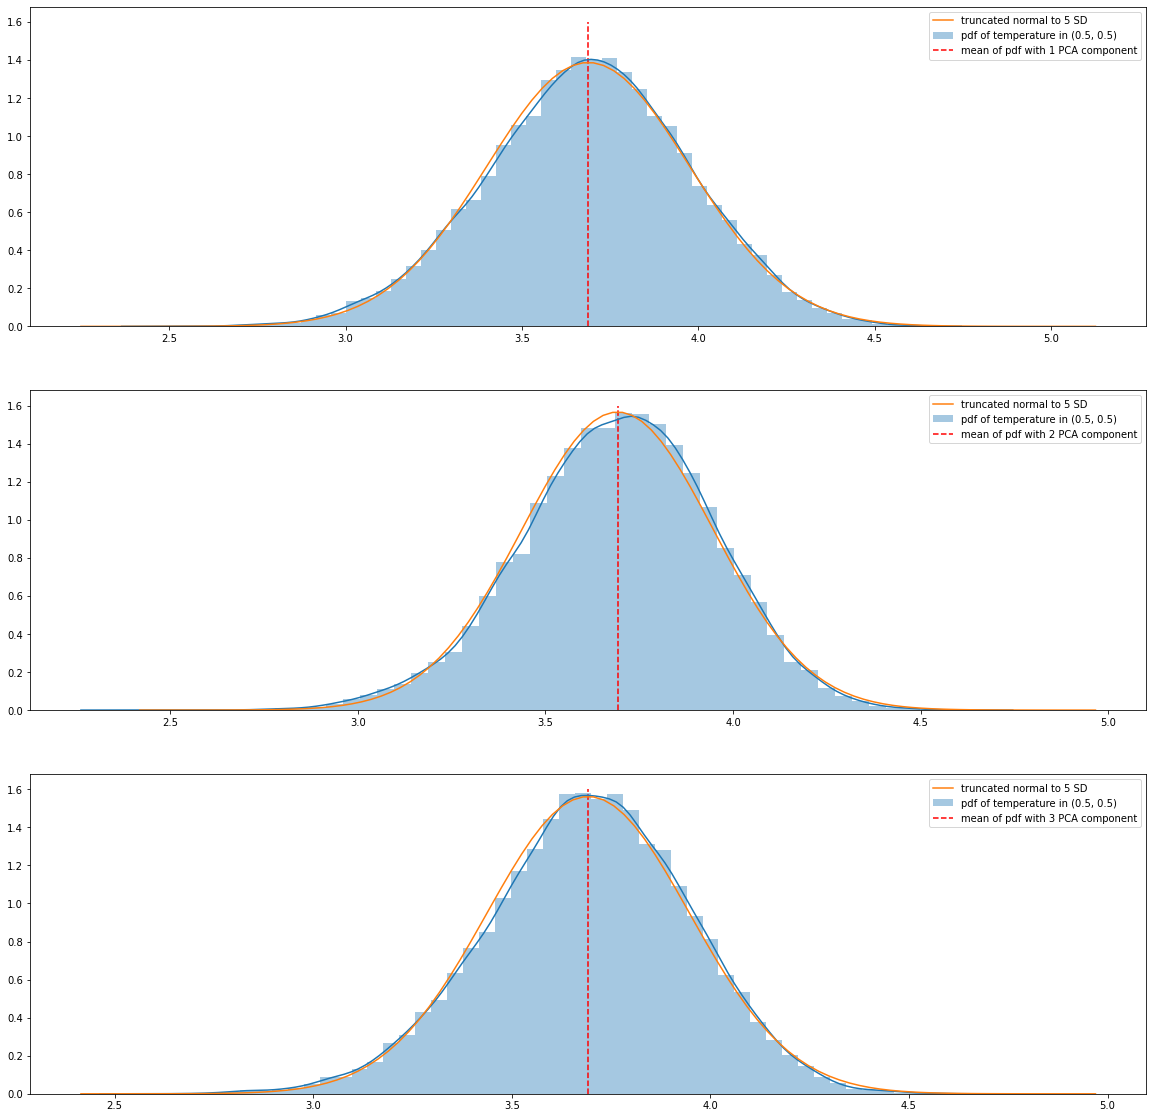

In [14]:
fig, axs = plt.subplots(3, 1, figsize = (20, 20))
for i, ax in enumerate(axs, 1):
    pca_mid = real(i)[:, mid]
    sns.distplot(pca_mid, ax = ax, label = "pdf of temperature in (0.5, 0.5)")
    ax.vlines(np.mean(pca_mid), ymin = 0, ymax = 1.6, colors = "red",
               label = "mean of pdf with {} PCA component".format(i),
               linestyles = "dashed")
    mu = np.mean(pca_mid)
    variance = np.var(pca_mid)
    sigma = math.sqrt(variance)
    x_1 = np.linspace(mu - 5*sigma, mu + 5*sigma, 100) # truncated normal
    ax.plot(x_1, stats.norm.pdf(x_1, mu, sigma), label = "truncated normal to 5 SD")
    ax.legend()
    print("PCA with {} component:\n\tmean: {}\n\tvariance: {}".format(i, np.mean(pca_mid), np.var(pca_mid)))
plt.show()

Από τα διαγράμματα παρατηρούμε ότι ακόμη και η 1η ιδιοτιμή έχει πολύ μεγάλο explainability, καθώς υπάρχει μεγάλη ομοιότητα στις probability density functions του 2ου και του 3ου ερωτήματος, με μόνη διαφορά στο variance (2o -> 0.056 ενώ 3ο -> 0.082). Προφάνως, και σε αυτό το ερώτημα είναι εμφανής η ομοιότητα με την αντίστοιχη (φραγμένη) Gaussian (το οποίο οφείλεται στο μεγάλο explainability της 1ης ιδιοτιμής). Με την αύξηση των PCA components παρατηρούμε ελαφρώς καλύτερη προσέγγιση, με εμφανείς βελτιώσεις στην pdf και κυρίως στην τιμή του variance που πλέον αντιστοιχεί απόλυτα σε αυτή του 2ου ερωτήματος.